#  Análise de Tempo de Maceração - Moagem A

## Objetivo
Análise detalhada do tempo de maceração da **Moagem A**, incluindo:
- Tendências temporais
- Distribuições estatísticas
- Comparações entre períodos
- Classificação por regimes de tempo

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #biblioteca para gráficos
import seaborn as sns #biblioteca para gráficos mais avançados


arquivo_dados = 'Dados maceração.xlsx' #variável que armazena o nome do arquivo com os dados

df_resumo = pd.read_excel( # lê o arquivo excel
    'Dados maceração.xlsx', #nome do arquivo com os dados
    sheet_name='Tempo mac' #nome da planilha que será lida
)




# df e a data frame que armazena os dados lidos do excel



df_resumo.head() #mostra as primeiras linhas do data frame para visualização dos dados
 


,Mês/Ano,Date,Hora,Folha,EtapaProcesso,Equipamento,ASPEN,Indicador,Valor,Valor_numero,Fato,Causa,Acao
0,jan/26,2026-01-22 00:00:00,Indefinido,Fechamento moagem A,Moagem,NaN,NaN,Tempo de maceração,38.0,38.0,NaN,NaN,NaN
1,jan/26,2026-01-22 00:00:00,Indefinido,Fechamento moagem B,Moagem,NaN,NaN,Tempo de maceração,38.0,38.0,NaN,NaN,NaN
2,jan/26,2026-01-22 00:00:00,Indefinido,Fechamento moagem B,Moagem,NaN,NaN,Tempo de maceração,40.0,40.0,NaN,NaN,NaN
3,jan/26,2026-01-21 00:00:00,Indefinido,Fechamento moagem A,Moagem,NaN,NaN,Tempo de maceração,45.0,45.0,NaN,NaN,NaN
4,jan/26,2026-01-21 00:00:00,Indefinido,Fechamento moagem A,Moagem,NaN,NaN,Tempo de maceração,55.0,55.0,NaN,NaN,NaN


In [39]:
df_resumo.columns



Index(['Mês/Ano', 'Date', 'Hora', 'Folha', 'EtapaProcesso', 'Equipamento',
       'ASPEN', 'Indicador', 'Valor', 'Valor_numero', 'Fato', 'Causa', 'Acao'],
      dtype='object')

In [40]:
col_mes = df_resumo.columns[0]
print(f"Coluna de período: '{col_mes}'")

Coluna de período: 'Mês/Ano'


In [41]:


col_tempo_A = [
    col for col in df_resumo.columns    
    if col.startswith('Moagem A - Tempo (t)')
]   

In [42]:
df_tempo_A = df_resumo[
    (df_resumo['Folha'].str.contains('moagem A', case=False, na=False)) &
    (df_resumo['Indicador'].str.contains('Tempo de maceração', case=False, na=False))
].copy()

df_tempo_A[['Mês/Ano', 'Folha', 'Indicador', 'Valor_numero']].head()

# str é usado para manipulação de strings em pandas
# case=False torna a busca case insensitive
# na=False evita erros com valores NaN
#str.contains verifica se uma string contém um determinado padrão

,Mês/Ano,Folha,Indicador,Valor_numero
0,jan/26,Fechamento moagem A,Tempo de maceração,38.0
3,jan/26,Fechamento moagem A,Tempo de maceração,45.0
4,jan/26,Fechamento moagem A,Tempo de maceração,55.0
5,jan/26,Fechamento moagem A,Tempo de maceração,180.0
10,jan/26,Fechamento moagem A,Tempo de maceração,85.0


In [ ]:
df_tempo_A['Valor'] = df_tempo_A[col_tempo_A].mean(axis=1)
df_tempo_A['Valor_std']   = df_tempo_A[col_tempo_A].std(axis=1)
df_tempo_A['Valor_delta'] = (
    df_tempo_A[col_tempo_A].max(axis=1) -
    df_tempo_A[col_tempo_A].min(axis=1)
)


In [ ]:
# Estatísticas descritivas do tempo de maceração
print(" ESTATÍSTICAS DO TEMPO DE MACERAÇÃO\n")
display(df_tempo_A['Valor_numero'].describe())

# Informações adicionais
print(f"\n✨ Informações Adicionais:")
print(f"   Total de registros: {df_tempo_A['Valor_numero'].count()}")
print(f"   Valores únicos: {df_tempo_A['Valor_numero'].nunique()}")


📊 ESTATÍSTICAS DO TEMPO DE MACERAÇÃO



count    1752.000000
mean       67.239332
std        44.874625
min         0.000000
25%        38.000000
50%        57.350000
75%        80.650000
max       400.000000
Name: Valor_numero, dtype: float64


✨ Informações Adicionais:
   Total de registros: 1752
   Valores únicos: 369


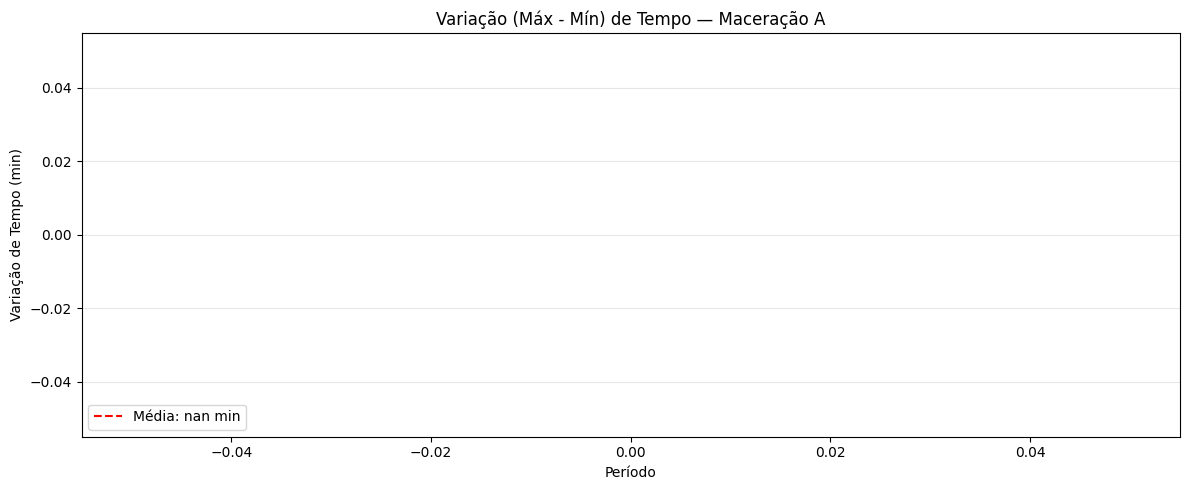

In [45]:
# df_tempo_A['Valor_numero'].plot(kind='hist', bins= 20, title='Distribuição do Tempo de Maceração - Moagem A')

#.plot() é um método do pandas usado para criar gráficos a partir de dados em DataFrames ou Series.
# kind especifica o tipo de gráfico (neste caso, histograma).
# bins define o número de intervalos (barras) no histograma.
# bins=20 significa que o histograma terá 20 barras.
# title define o título do gráfico.

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(range(len(df_tempo_A['Valor_numero' ])), df_tempo_A['Valor_delta'], color="#9B3309", alpha=0.7)
ax.set_xlabel('Período')
ax.set_ylabel('Variação de Tempo (min)')
ax.set_title('Variação (Máx - Mín) de Tempo — Maceração A')
ax.axhline(df_tempo_A['Valor_delta'].mean(), color='red', linestyle='--', 
           label=f'Média: {df_tempo_A["Valor_delta"].mean():.2f} min')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [46]:
df_tempo_A['Valor_numero'].quantile([0.1, 0.25, 0.5, 0.75, 0.9]) # Quantis do tempo de maceração

#.quantile() calcula os quantis de uma série de dados, retornando os valores correspondentes aos percentis especificados.
#que significam os pontos abaixo dos quais uma certa porcentagem dos dados cai.

0.10     30.01
0.25     38.00
0.50     57.35
0.75     80.65
0.90    120.00
Name: Valor_numero, dtype: float64

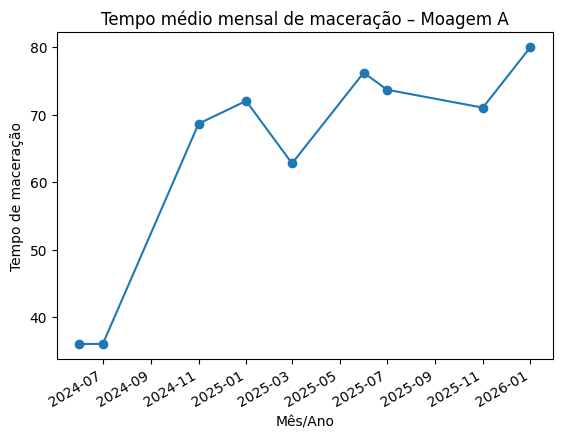

In [47]:
df_tempo_A['MesAno_dt'] = pd.to_datetime( 
    df_tempo_A['Mês/Ano'],
    format='%b/%y',
    errors='coerce'
)

df_tempo_mensal = (
    df_tempo_A
    .groupby('MesAno_dt')['Valor_numero']
    .mean()
    .sort_index()
)

df_tempo_mensal.plot(
    marker='o',
    title='Tempo médio mensal de maceração – Moagem A'
)

plt.ylabel('Tempo de maceração')
plt.xlabel('Mês/Ano')
plt.show()

#to_datetime converte uma coluna de strings em objetos datetime, facilitando a manipulação de datas.
#format especifica o formato das datas na coluna original.
#errors='coerce' converte valores inválidos em NaT (Not a Time)
#coerce é usado para lidar com erros de conversão, substituindo valores inválidos por NaT (Not a Time).
#===========================================

#.groupby agrupa os dados com base em uma ou mais colunas, permitindo operações agregadas.
#.mean calcula a média dos valores em cada grupo.
#.sort_index ordena o DataFrame ou Series com base no índice.

#-------------------------------------------
#marker='o' adiciona marcadores circulares aos pontos de dados no gráfico.
#title define o título do gráfico.
#plt.ylabel define o rótulo do eixo y.
#plt.xlabel define o rótulo do eixo x.
#plt.show() exibe o gráfico gerado.

In [48]:
## 🔍 Análise Exploratória das Macerações

In [ ]:
# Filtrar todas as linhas que contêm "Tempo de maceração"
total_maceracao = df_resumo[
    df_resumo['Indicador'].str.contains('Tempo de maceração', case=False, na=False)
]

print(" RESUMO DAS MACERAÇÕES\n")
print(f"Total de registros de maceração: {len(total_maceracao)}")
print(f"Registros da Moagem A: {len(df_tempo_A)}")
print(f"Outras moagens: {len(total_maceracao) - len(df_tempo_A)}\n")

# Distribuição por folha/moagem
print("Distribuição por tipo de moagem:")
print(total_maceracao['Folha'].value_counts())

# Verificar quais outras moagens existem além da Moagem A
print("\n Outras moagens disponíveis (exceto Moagem A):")
outras_moagens = total_maceracao[
    ~total_maceracao['Folha'].str.contains('moagem A', case=False, na=False)
][['Folha', 'Indicador']].drop_duplicates()

if len(outras_moagens) > 0:
    print(outras_moagens.to_string(index=False))
else:
    print("   Nenhuma outra moagem encontrada")


📊 RESUMO DAS MACERAÇÕES

Total de registros de maceração: 3162
Registros da Moagem A: 1752
Outras moagens: 1410

📋 Distribuição por tipo de moagem:
Folha
Fechamento moagem A    1752
Fechamento moagem B    1410
Name: count, dtype: int64

🔎 Outras moagens disponíveis (exceto Moagem A):
              Folha          Indicador
Fechamento moagem B Tempo de maceração


In [ ]:
##  Filtro de Período 2024-2026

#Análise focada nos dados mais recentes para identificar tendências atuais.

In [ ]:
# Garantir tipo datetime (se ainda não foi feito)
if 'MesAno_dt1' not in df_tempo_A.columns:
    df_tempo_A['MesAno_dt1'] = pd.to_datetime(
        df_tempo_A['Mês/Ano'], 
        format='%b/%y', 
        errors='coerce'
    )

# Filtrar período 2024-2026
df_tempo_2426 = df_tempo_A[
    (df_tempo_A['MesAno_dt1'] >= '2024-01-01') &
    (df_tempo_A['MesAno_dt1'] <= '2026-12-31')
].copy()

print(f" Total de registros filtrados (2024-2026): {len(df_tempo_2426)}")
print(f"   Período: {df_tempo_2426['MesAno_dt1'].min().strftime('%b/%Y')} até {df_tempo_2426['MesAno_dt1'].max().strftime('%b/%Y')}")

# Verificar meses únicos
meses_unicos = df_tempo_2426[['Mês/Ano', 'MesAno_dt1']].drop_duplicates().sort_values('MesAno_dt1')
print(f"\n   Total de meses: {len(meses_unicos)}")


📊 Total de registros filtrados (2024-2026): 694
   Período: Jun/2024 até Jan/2026

   Total de meses: 9


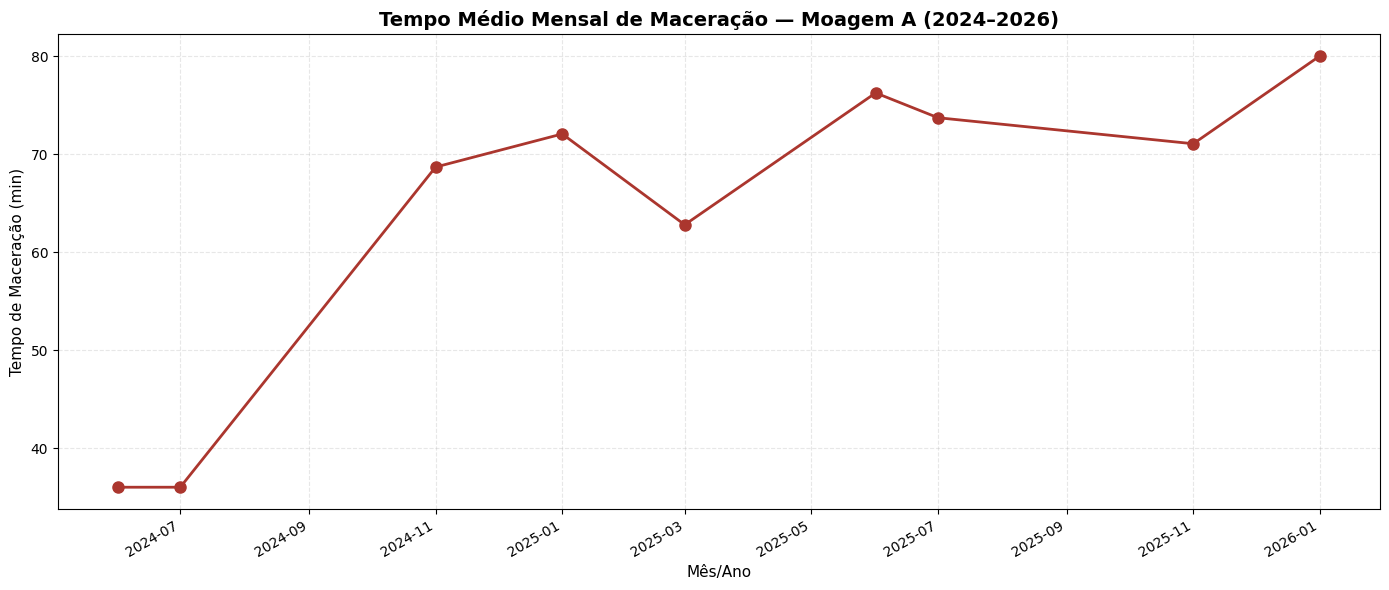


Tempo médio geral: 64.06 min
Tempo mínimo: 36.00 min (Jun/2024)
Tempo máximo: 80.02 min (Jan/2026)


In [52]:
# Calcular tempo médio mensal para o período 2024-2026
tempo_mensal_2426 = (
    df_tempo_2426
    .groupby('MesAno_dt1')['Valor_numero']
    .mean()
    .sort_index()
)

# Criar gráfico
plt.figure(figsize=(14, 6))
tempo_mensal_2426.plot(
    marker='o',
    linewidth=2,
    color='#AB362E',
    markersize=8
)

plt.title('Tempo Médio Mensal de Maceração — Moagem A (2024–2026)', fontsize=14, fontweight='bold')
plt.ylabel('Tempo de Maceração (min)', fontsize=11)
plt.xlabel('Mês/Ano', fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"\nTempo médio geral: {tempo_mensal_2426.mean():.2f} min")
print(f"Tempo mínimo: {tempo_mensal_2426.min():.2f} min ({tempo_mensal_2426.idxmin().strftime('%b/%Y')})")
print(f"Tempo máximo: {tempo_mensal_2426.max():.2f} min ({tempo_mensal_2426.idxmax().strftime('%b/%Y')})")


In [ ]:
# Análise estatística por ano
df_tempo_2426['Ano'] = df_tempo_2426['MesAno_dt1'].dt.year

print(" ESTATÍSTICAS POR ANO\n")
stats_por_ano = df_tempo_2426.groupby('Ano')['Valor_numero'].describe()
display(stats_por_ano)

# Comparação entre anos
print("\n COMPARAÇÃO ENTRE ANOS:")
for ano in sorted(df_tempo_2426['Ano'].unique()):
    media = df_tempo_2426[df_tempo_2426['Ano'] == ano]['Valor_numero'].mean()
    print(f"   {ano}: {media:.2f} min (média)")


📊 ESTATÍSTICAS POR ANO



,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2024,122.0,68.139344,40.418946,0.0,36.00,60.0,91.5,198.0
2025,519.0,70.951214,48.244107,0.0,38.05,62.4,84.0,400.0
2026,53.0,80.018868,50.008265,0.0,48.00,68.0,96.0,270.0



📈 COMPARAÇÃO ENTRE ANOS:
   2024: 68.14 min (média)
   2025: 70.95 min (média)
   2026: 80.02 min (média)


##  Análise Estatística por Ano

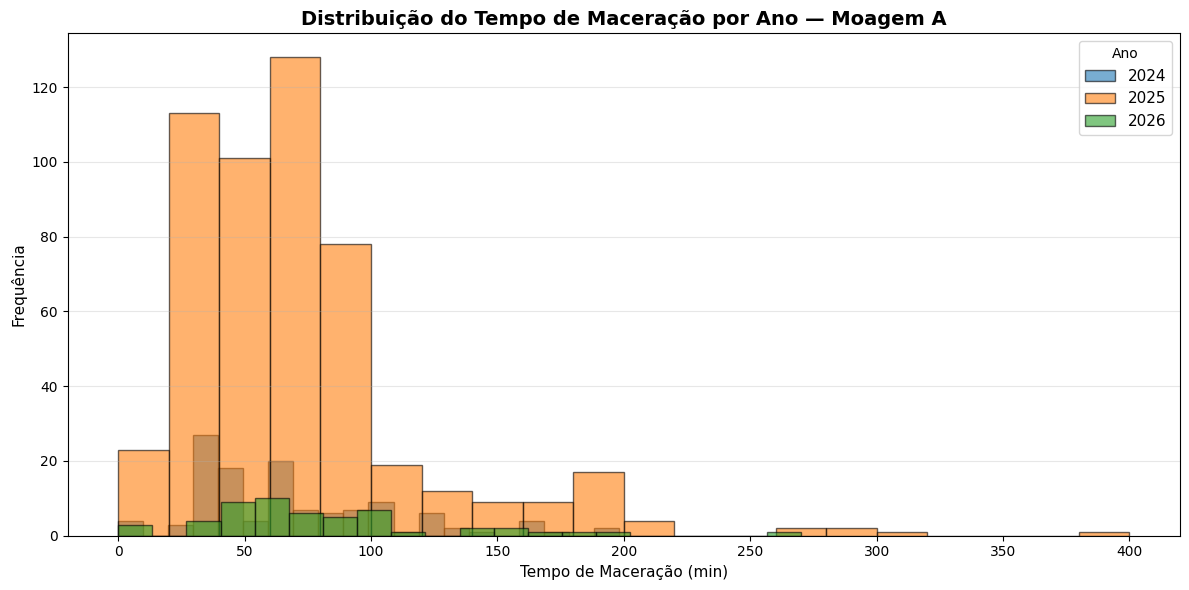

In [54]:
# Distribuição do tempo de maceração por ano
plt.figure(figsize=(12, 6))

for ano in sorted(df_tempo_2426['Ano'].unique()):
    dados_ano = df_tempo_2426[df_tempo_2426['Ano'] == ano]['Valor_numero']
    plt.hist(dados_ano, bins=20, alpha=0.6, label=str(ano), edgecolor='black')

plt.legend(title='Ano', fontsize=11)
plt.title('Distribuição do Tempo de Maceração por Ano — Moagem A', fontsize=14, fontweight='bold')
plt.xlabel('Tempo de Maceração (min)', fontsize=11)
plt.ylabel('Frequência', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Definir ponto de mudança para comparação antes/depois
ponto_mudanca = pd.to_datetime('2024-11-01')

df_tempo_2426['Periodo'] = np.where(
    df_tempo_2426['MesAno_dt1'] < ponto_mudanca,
    'Antes Nov/2024',
    'Após Nov/2024'
)

print(" ANÁLISE ANTES E DEPOIS DE NOVEMBRO/2024\n")
stats_periodo = df_tempo_2426.groupby('Periodo')['Valor_numero'].describe()
display(stats_periodo)

# Comparação detalhada
print("\n COMPARAÇÃO DETALHADA:")
antes = df_tempo_2426[df_tempo_2426['Periodo'] == 'Antes Nov/2024']['Valor_numero']
depois = df_tempo_2426[df_tempo_2426['Periodo'] == 'Após Nov/2024']['Valor_numero']

diferenca = depois.mean() - antes.mean()
variacao_pct = (diferenca / antes.mean()) * 100

print(f"   Média Antes:  {antes.mean():.2f} min")
print(f"   Média Depois: {depois.mean():.2f} min")
print(f"   Diferença:    {diferenca:+.2f} min ({variacao_pct:+.1f}%)")
print(f"   Registros:    {len(antes)} (antes) vs {len(depois)} (depois)")


📊 ANÁLISE ANTES E DEPOIS DE NOVEMBRO/2024



,count,mean,std,min,25%,50%,75%,max
Periodo,,,,,,,,
Antes Nov/2024,2.0,36.000000,0.000000,36.0,36.000,36.00,36.00,36.0
Após Nov/2024,692.0,71.250983,47.150013,0.0,39.875,62.45,86.35,400.0



🔍 COMPARAÇÃO DETALHADA:
   Média Antes:  36.00 min
   Média Depois: 71.25 min
   Diferença:    +35.25 min (+97.9%)
   Registros:    2 (antes) vs 692 (depois)


##  Análise Comparativa Antes/Depois

In [56]:
q25 = df_tempo_2426['Valor_numero'].quantile(0.25) #calcula o primeiro quartil (25º percentil) do tempo de maceração
q75 = df_tempo_2426['Valor_numero'].quantile(0.75)  #calcula o terceiro quartil (75º percentil) do tempo de maceração
 
q25, q75 #retorna os valores do primeiro e terceiro quartis


(np.float64(39.5), np.float64(86.225))

##  Classificação por Regime de Tempo

Classificação baseada em quartis para identificar padrões:
- **Curto**: Abaixo do 1º quartil (Q1 - 25%)
- **Normal**: Entre Q1 e Q3 (25% - 75%)
- **Longo**: Acima do 3º quartil (Q3 - 75%)

In [ ]:
# Calcular quartis para classificação
q25 = df_tempo_2426['Valor_numero'].quantile(0.25)
q75 = df_tempo_2426['Valor_numero'].quantile(0.75)

print(f"📏 Limites de Classificação:")
print(f"   Q1 (25%): {q25:.2f} min")
print(f"   Q3 (75%): {q75:.2f} min\n")

# Função para classificar baseada nos quartis
def classificar_regime_tempo(valor):
    """
    Classifica o tempo de maceração em três categorias:
    - Curto: abaixo do 1º quartil (25%)
    - Normal: entre o 1º e 3º quartil (25% - 75%)
    - Longo: acima do 3º quartil (75%)
    """
    if valor < q25:
        return 'Curto'
    elif valor > q75:
        return 'Longo'
    else:
        return 'Normal'

# Aplicar classificação
df_tempo_2426['Regime_tempo'] = df_tempo_2426['Valor_numero'].apply(classificar_regime_tempo)

print(" Classificação aplicada com sucesso!")


📏 Limites de Classificação:
   Q1 (25%): 39.50 min
   Q3 (75%): 86.22 min

✅ Classificação aplicada com sucesso!


In [ ]:
# Contagem e proporção de cada regime
print(" DISTRIBUIÇÃO DOS REGIMES DE TEMPO\n")
contagem = df_tempo_2426['Regime_tempo'].value_counts()
proporcao = df_tempo_2426['Regime_tempo'].value_counts(normalize=True) * 100

for regime in ['Curto', 'Normal', 'Longo']:
    if regime in contagem.index:
        print(f"   {regime:8s}: {contagem[regime]:3d} registros ({proporcao[regime]:.1f}%)")


📊 DISTRIBUIÇÃO DOS REGIMES DE TEMPO

   Curto   : 173 registros (24.9%)
   Normal  : 347 registros (50.0%)
   Longo   : 174 registros (25.1%)


In [59]:
# Tabela cruzada: Regime por mês
print("📋 REGIMES DE TEMPO POR MÊS\n")
tabela_cruzada = pd.crosstab(
    df_tempo_2426['MesAno_dt1'].dt.to_period('M'),
    df_tempo_2426['Regime_tempo']
)

display(tabela_cruzada)


📋 REGIMES DE TEMPO POR MÊS



Regime_tempo,Curto,Longo,Normal
MesAno_dt1,,,
2024-06,1,0,0
2024-07,1,0,0
2024-11,32,33,55
2025-01,47,35,23
2025-03,39,18,58
2025-06,16,25,57
2025-07,17,23,67
2025-11,15,22,57
2026-01,5,18,30


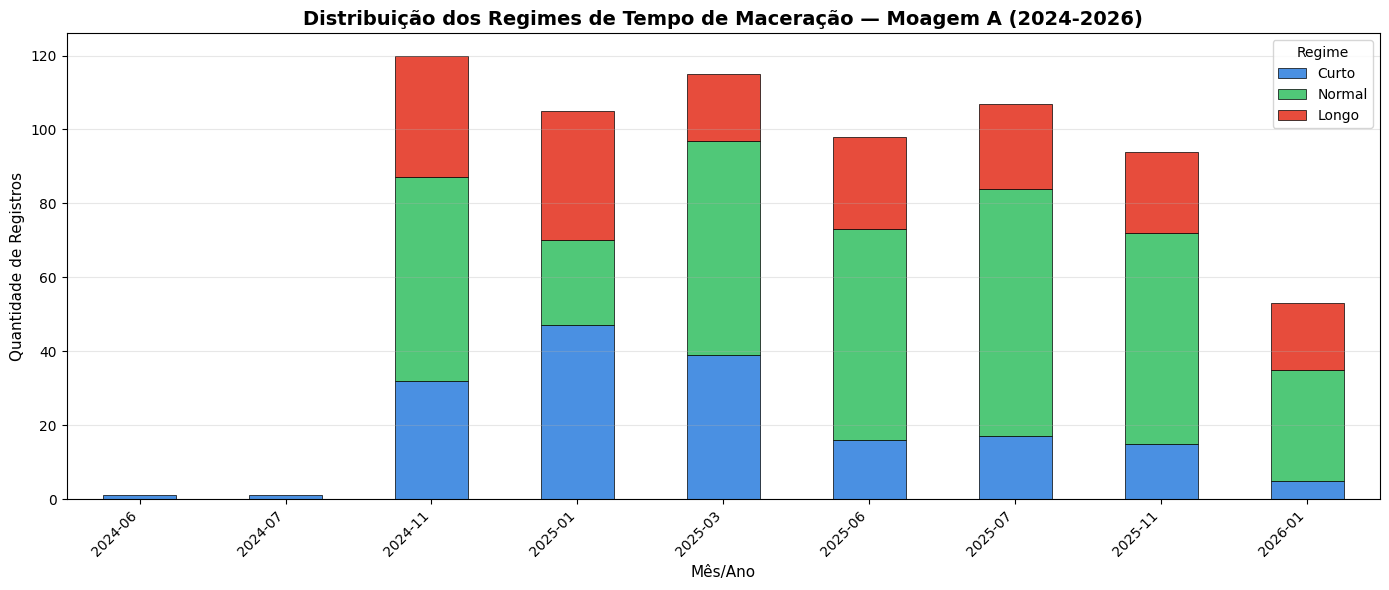

In [60]:
# Gráfico de barras empilhadas: Distribuição dos regimes ao longo do tempo
fig, ax = plt.subplots(figsize=(14, 6))

dados_plot = df_tempo_2426.groupby(
    [df_tempo_2426['MesAno_dt1'].dt.to_period('M'), 'Regime_tempo']
).size().unstack(fill_value=0)

# Garantir ordem das colunas
ordem_colunas = ['Curto', 'Normal', 'Longo']
dados_plot = dados_plot[[col for col in ordem_colunas if col in dados_plot.columns]]

dados_plot.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#4A90E2', '#50C878', '#E74C3C'],
    edgecolor='black',
    linewidth=0.5
)

ax.set_title('Distribuição dos Regimes de Tempo de Maceração — Moagem A (2024-2026)', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Quantidade de Registros', fontsize=11)
ax.set_xlabel('Mês/Ano', fontsize=11)
ax.legend(title='Regime', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Exportar relatório para arquivo de texto
nome_arquivo = f'relatorio_tempo_maceracao_A_{datetime.now().strftime("%Y%m%d_%H%M")}.txt'

with open(nome_arquivo, 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("RELATÓRIO DE ANÁLISE - TEMPO DE MACERAÇÃO A\n")
    f.write("=" * 80 + "\n")
    f.write(f"Data de geração: {datetime.now().strftime('%d/%m/%Y %H:%M')}\n")
    f.write(f"Período analisado: {len(df_tempo_2426)} registros ({len(meses_unicos)} meses)\n")
    f.write("=" * 80 + "\n\n")
    
    f.write(" 1. ESTATÍSTICAS GERAIS\n\n")
    f.write(f"   Tempo Médio Geral:            {df_tempo_2426['Valor_numero'].mean():.2f} min\n")
    f.write(f"   Tempo Mínimo:                 {df_tempo_2426['Valor_numero'].min():.2f} min\n")
    f.write(f"   Tempo Máximo:                 {df_tempo_2426['Valor_numero'].max():.2f} min\n")
    f.write(f"   Amplitude Total:              {df_tempo_2426['Valor_numero'].max() - df_tempo_2426['Valor_numero'].min():.2f} min\n")
    f.write(f"   Desvio Padrão Médio:          {df_tempo_2426['Valor_numero'].std():.2f} min\n")
    f.write(f"   Coeficiente de Variação:      {(df_tempo_2426['Valor_numero'].std() / df_tempo_2426['Valor_numero'].mean() * 100):.2f}%\n\n")
    
    f.write(" 2. DISTRIBUIÇÃO POR REGIME\n\n")
    f.write(f"   Tempo Curto (< Q1):           {contagem.get('Curto', 0)} registros ({proporcao.get('Curto', 0):.1f}%)\n")
    f.write(f"   Tempo Normal (Q1-Q3):         {contagem.get('Normal', 0)} registros ({proporcao.get('Normal', 0):.1f}%)\n")
    f.write(f"   Tempo Longo (> Q3):           {contagem.get('Longo', 0)} registros ({proporcao.get('Longo', 0):.1f}%)\n\n")
    
    f.write(" 3. COMPARAÇÃO ANTES/DEPOIS NOV-2024\n\n")
    f.write(f"   ANTES DE NOVEMBRO/2024:\n")
    f.write(f"      • Tempo médio:              {antes.mean():.2f} min\n")
    f.write(f"      • Desvio padrão:            {antes.std():.2f} min\n")
    f.write(f"      • Registros:                {len(antes)}\n\n")
    f.write(f"   DEPOIS DE NOVEMBRO/2024:\n")
    f.write(f"      • Tempo médio:              {depois.mean():.2f} min\n")
    f.write(f"      • Desvio padrão:            {depois.std():.2f} min\n")
    f.write(f"      • Registros:                {len(depois)}\n\n")
    f.write(f"   VARIAÇÃO ENTRE PERÍODOS:\n")
    f.write(f"      • Diferença de tempo:       {diferenca:+.2f} min ({variacao_pct:+.1f}%)\n")
    f.write(f"      • Diferença de estabilidade: {(depois.std() - antes.std()):+.2f} min\n\n")
    
    f.write(" 4. ANÁLISE POR ANO\n\n")
    for ano in sorted(df_tempo_2426['Ano'].unique()):
        dados_ano = df_tempo_2426[df_tempo_2426['Ano'] == ano]['Valor_numero']
        f.write(f"   {ano}:\n")
        f.write(f"      • Tempo médio:              {dados_ano.mean():.2f} min\n")
        f.write(f"      • Desvio padrão:            {dados_ano.std():.2f} min\n")
        f.write(f"      • Registros:                {len(dados_ano)}\n\n")
    
    f.write("⚠️ 5. OBSERVAÇÕES\n\n")
    
    # Detectar outliers
    Q1_rel = df_tempo_2426['Valor_numero'].quantile(0.25)
    Q3_rel = df_tempo_2426['Valor_numero'].quantile(0.75)
    IQR_rel = Q3_rel - Q1_rel
    outliers_rel = df_tempo_2426[
        (df_tempo_2426['Valor_numero'] < Q1_rel - 1.5*IQR_rel) | 
        (df_tempo_2426['Valor_numero'] > Q3_rel + 1.5*IQR_rel)
    ]
    
    f.write("   • Outliers detectados:\n")
    if len(outliers_rel) > 0:
        f.write(f"      - {len(outliers_rel)} outlier(s) detectado(s) no tempo de maceração\n")
    else:
        f.write("      - Nenhum outlier detectado\n")
    
    f.write("   • Estabilidade do processo:\n")
    cv_rel = (df_tempo_2426['Valor_numero'].std() / df_tempo_2426['Valor_numero'].mean() * 100)
    if cv_rel < 5:
        f.write("      - Processo apresenta ALTA estabilidade (CV < 5%)\n")
    elif cv_rel < 10:
        f.write("      - Processo apresenta BOA estabilidade (CV < 10%)\n")
    else:
        f.write("      - Processo apresenta MÉDIA estabilidade (CV ≥ 10%)\n")
    
    f.write("   • Tendência observada:\n")
    if variacao_pct > 5:
        f.write(f"      - Tendência de AUMENTO no tempo de maceração (+{variacao_pct:.1f}%)\n")
    elif variacao_pct < -5:
        f.write(f"      - Tendência de REDUÇÃO no tempo de maceração ({variacao_pct:.1f}%)\n")
    else:
        f.write("      - Tempo de maceração ESTÁVEL entre períodos\n")
    
    f.write("\n")
    
    f.write(" CONCLUSÕES E RECOMENDAÇÕES\n\n")
    f.write("Principais Achados:\n")
    f.write("1. Variação temporal identificada no tempo de maceração ao longo do período\n")
    f.write("2. Distribuição clara por regimes (Curto/Normal/Longo)\n")
    f.write("3. Mudanças significativas observadas em Nov/2024\n\n")
    f.write("Recomendações:\n")
    f.write("- Investigar causas de outliers detectados\n")
    f.write("- Monitorar tendências de variação no tempo\n")
    f.write("- Padronizar processos para reduzir variabilidade\n")
    f.write("- Documentar mudanças implementadas\n")
    f.write("- Estabelecer limites de controle baseados nos quartis\n\n")
    f.write("=" * 80 + "\n")

print(f" Relatório salvo em: {nome_arquivo}")


✅ Relatório salvo em: relatorio_tempo_maceracao_A_20260204_2214.txt


##  Conclusões e Recomendações

### Principais Achados:
1. **Variação temporal**: Análise mostra mudanças no tempo de maceração ao longo do período
2. **Distribuição por regime**: Identificação clara de padrões Curto/Normal/Longo
3. **Impacto de mudanças**: Comparação antes/depois de Nov/2024 evidencia alterações no processo

### Recomendações:
- ✅ Investigar causas de outliers detectados
- ✅ Monitorar tendências de variação no tempo
- ✅ Padronizar processos para reduzir variabilidade
- ✅ Documentar mudanças implementadas em Nov/2024
- ✅ Estabelecer limites de controle baseados nos quartis

In [ ]:
# Gerar relatório automático
from datetime import datetime

print("=" * 80)
print("RELATÓRIO DE ANÁLISE - TEMPO DE MACERAÇÃO A")
print("=" * 80)
print(f"Data de geração: {datetime.now().strftime('%d/%m/%Y %H:%M')}")
print(f"Período analisado: {len(df_tempo_2426)} registros ({len(meses_unicos)} meses)")
print("=" * 80)

print("\n 1. ESTATÍSTICAS GERAIS\n")
print(f"   Tempo Médio Geral:            {df_tempo_2426['Valor_numero'].mean():.2f} min")
print(f"   Tempo Mínimo:                 {df_tempo_2426['Valor_numero'].min():.2f} min")
print(f"   Tempo Máximo:                 {df_tempo_2426['Valor_numero'].max():.2f} min")
print(f"   Amplitude Total:              {df_tempo_2426['Valor_numero'].max() - df_tempo_2426['Valor_numero'].min():.2f} min")
print(f"   Desvio Padrão Médio:          {df_tempo_2426['Valor_numero'].std():.2f} min")
print(f"   Coeficiente de Variação:      {(df_tempo_2426['Valor_numero'].std() / df_tempo_2426['Valor_numero'].mean() * 100):.2f}%")

print("\n 2. DISTRIBUIÇÃO POR REGIME\n")
print(f"   Tempo Curto (< Q1):           {contagem.get('Curto', 0)} registros ({proporcao.get('Curto', 0):.1f}%)")
print(f"   Tempo Normal (Q1-Q3):         {contagem.get('Normal', 0)} registros ({proporcao.get('Normal', 0):.1f}%)")
print(f"   Tempo Longo (> Q3):           {contagem.get('Longo', 0)} registros ({proporcao.get('Longo', 0):.1f}%)")

print("\n 3. COMPARAÇÃO ANTES/DEPOIS NOV-2024\n")
print(f"   ANTES DE NOVEMBRO/2024:")
print(f"      • Tempo médio:              {antes.mean():.2f} min")
print(f"      • Desvio padrão:            {antes.std():.2f} min")
print(f"      • Registros:                {len(antes)}")

print(f"\n   DEPOIS DE NOVEMBRO/2024:")
print(f"      • Tempo médio:              {depois.mean():.2f} min")
print(f"      • Desvio padrão:            {depois.std():.2f} min")
print(f"      • Registros:                {len(depois)}")

print(f"\n   VARIAÇÃO ENTRE PERÍODOS:")
print(f"      • Diferença de tempo:       {diferenca:+.2f} min ({variacao_pct:+.1f}%)")
print(f"      • Diferença de estabilidade: {(depois.std() - antes.std()):+.2f} min")

print("\n 4. ANÁLISE POR ANO\n")
for ano in sorted(df_tempo_2426['Ano'].unique()):
    dados_ano = df_tempo_2426[df_tempo_2426['Ano'] == ano]['Valor_numero']
    print(f"   {ano}:")
    print(f"      • Tempo médio:              {dados_ano.mean():.2f} min")
    print(f"      • Desvio padrão:            {dados_ano.std():.2f} min")
    print(f"      • Registros:                {len(dados_ano)}")

print("\n⚠️ 5. OBSERVAÇÕES\n")

# Detectar outliers
Q1 = df_tempo_2426['Valor_numero'].quantile(0.25)
Q3 = df_tempo_2426['Valor_numero'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_tempo_2426[
    (df_tempo_2426['Valor_numero'] < Q1 - 1.5*IQR) | 
    (df_tempo_2426['Valor_numero'] > Q3 + 1.5*IQR)
]

if len(outliers) > 0:
    print(f"   • {len(outliers)} outlier(s) detectado(s) no tempo de maceração")
else:
    print("   • Nenhum outlier detectado")

# Avaliar estabilidade
cv = (df_tempo_2426['Valor_numero'].std() / df_tempo_2426['Valor_numero'].mean() * 100)
if cv < 5:
    print("   • Processo apresenta ALTA estabilidade (CV < 5%)")
elif cv < 10:
    print("   • Processo apresenta BOA estabilidade (CV < 10%)")
else:
    print("   • Processo apresenta MÉDIA estabilidade (CV ≥ 10%)")

# Tendência
if variacao_pct > 5:
    print(f"   • Tendência de AUMENTO no tempo de maceração (+{variacao_pct:.1f}%)")
elif variacao_pct < -5:
    print(f"   • Tendência de REDUÇÃO no tempo de maceração ({variacao_pct:.1f}%)")
else:
    print("   • Tempo de maceração ESTÁVEL entre períodos")

print("\n" + "=" * 80)


RELATÓRIO DE ANÁLISE - TEMPO DE MACERAÇÃO A
Data de geração: 04/02/2026 22:05
Período analisado: 694 registros (9 meses)

📈 1. ESTATÍSTICAS GERAIS

   Tempo Médio Geral:            71.15 min
   Tempo Mínimo:                 0.00 min
   Tempo Máximo:                 400.00 min
   Amplitude Total:              400.00 min
   Desvio Padrão Médio:          47.12 min
   Coeficiente de Variação:      66.23%

🔍 2. DISTRIBUIÇÃO POR REGIME

   Tempo Curto (< Q1):           173 registros (24.9%)
   Tempo Normal (Q1-Q3):         347 registros (50.0%)
   Tempo Longo (> Q3):           174 registros (25.1%)

📊 3. COMPARAÇÃO ANTES/DEPOIS NOV-2024

   ANTES DE NOVEMBRO/2024:
      • Tempo médio:              36.00 min
      • Desvio padrão:            0.00 min
      • Registros:                2

   DEPOIS DE NOVEMBRO/2024:
      • Tempo médio:              71.25 min
      • Desvio padrão:            47.15 min
      • Registros:                692

   VARIAÇÃO ENTRE PERÍODOS:
      • Diferença de tempo

#  RELATÓRIO DE ANÁLISE - Tempo de Maceração A

---